Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.


In [5]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler, power_transform
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
import pickle

In [6]:
df=pd.read_csv('Telecom_customer_churn.csv')

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.shape

(7043, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
for col in df.columns:
    print(df[col].value_counts())
    print("\n")

3487-EARAT    1
2114-MGINA    1
7876-DNYAP    1
7465-ZZRVX    1
3077-RSNTJ    1
             ..
2651-ZCBXV    1
3234-VKACU    1
8805-JNRAZ    1
0236-HFWSV    1
3639-XJHKQ    1
Name: customerID, Length: 7043, dtype: int64


Male      3555
Female    3488
Name: gender, dtype: int64


0    5901
1    1142
Name: SeniorCitizen, dtype: int64


No     3641
Yes    3402
Name: Partner, dtype: int64


No     4933
Yes    2110
Name: Dependents, dtype: int64


1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


Yes    6361
No      682
Name: PhoneService, dtype: int64


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


No         

We can observe that the "Total charges" has continuous data but it is an object type under df.info(). Let us handle this column.

In [11]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [12]:
df.loc[df['TotalCharges']== " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
df["TotalCharges"]=df["TotalCharges"].replace(" ",np.nan)

In [14]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
# to impute these value we need to first convert the datatype from object to float to enable imputing the nan values with mean
df["TotalCharges"]=df["TotalCharges"].astype(float)
df["TotalCharges"].fillna(df["TotalCharges"].mean(),inplace=True)

In [16]:
df["TotalCharges"].isnull().sum()

0

Null values succesfully imputed.

# EDA:

In [17]:
df["SeniorCitizen"].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [18]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.drop("customerID",axis=1,inplace=True)

In [21]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [22]:
df.shape

(7043, 20)

Usually we can directly infer the categorical features from their dtype "object", but in this dataset the "SeniorCitizen" feature is already encoded and hence, is of dtype="int64". We will add this feature in our categorical df for further visualizations instead of using it with numerical columns.

In [23]:
cat_df=df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']].copy()

In [24]:
cat_df.shape

(7043, 17)

# EDA:

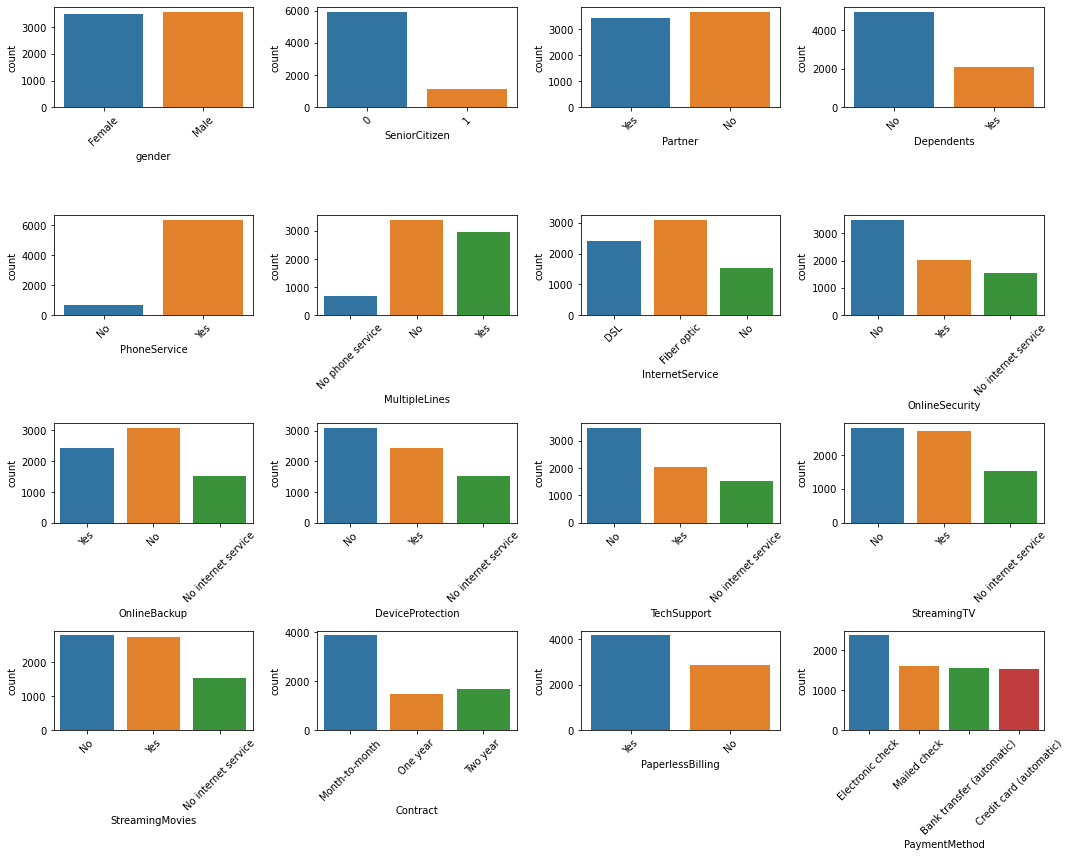

In [25]:
plt.figure(figsize=(15,12))
x=1
for col in cat_df.columns:
    if x<=16:
        plt.subplot(4,4,x)
        sns.countplot(x=col, data=cat_df)
#         print(cat_df[col].value_counts())
        plt.xticks(rotation=45)
        x+=1
plt.tight_layout()
plt.show()

Observations:
- Almost equal number of Males and Females are present in the dataset
- Majority of the population is not a Senior Citizen, indicating most belong the workforce.
- Half of the population is single.
- Majority of population do not have any dependents.
- Almost everyone is having a phone service.
- Almost equal people said they have and don't have multiple lines.
- Large chunk of the people use Fiber Internet and DSL is the second most used Internet Service type.
- Majority of the people do not have any kind of online security.
- Almost half of the people do not have any online backup of their data
- Slighly less than half of the population dont own any Device protection.
- Most of the people have not used any kind of tech support.
- Equal porrtions of people who own and don't own streaming TV service.
- Equal porrtions of people who own and don't own streaming movie service.
- More than half of the people are enrolled in month to month service as their contract.
- Most people opted in for Paperless Billing.
-  Electronic check is the most used payment method. Other payment methods like mailed check,bank transfer and automatic credit card payment have equal amount of users.

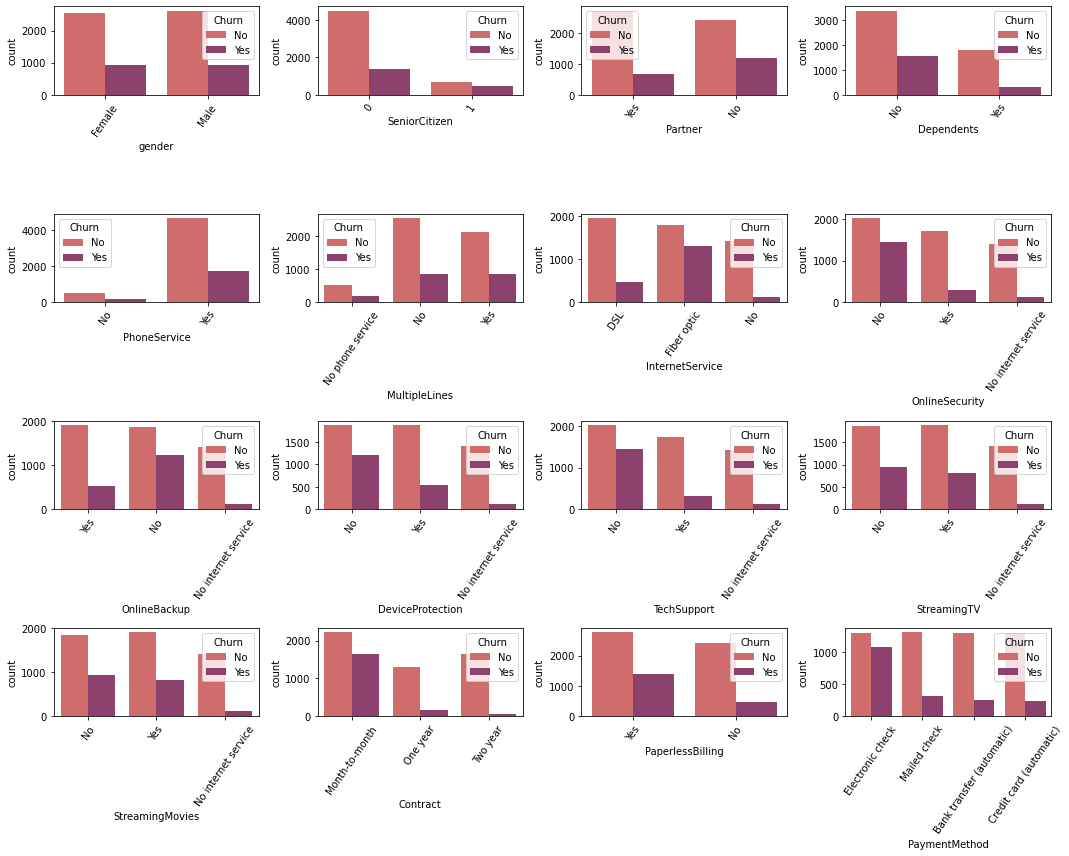

In [26]:
plt.figure(figsize=(15,12))
x=1
for col in cat_df.columns:
    if x<=16:
        plt.subplot(4,4,x)
        sns.countplot(x=col,hue="Churn",data=cat_df,palette="flare")
#         plt.ylabel('Churn')
        plt.xticks(rotation=55)
        x+=1
plt.tight_layout()
plt.show()

Observations:
- Male and female are equally likely to churn 
- Younger citizens are more likely to churn than the Senior Citizens.
- People who aren't a partner, are more likely to xhurn than the partners.
- There are more people who do not have dependents and the churn rate among them is higher compared to who have dependents.
- Atleast 85% of people have Phoneservice and the churn rate is high among them.
- More people are churning who have multiple lines compared to single line and no phone service users.
- Fibre optic have the most users but the churn rate amonbg them is way higher compared to DSL users which is just marginally low in number of users.
- People with No online security are highly likely to churn compared to people who do have online security whose users are a tad bit lower than users with no online security.
- People are highly likely to churn when they do not have any online backup compared to other categories.
- People who dont have any kind of Device protection have a high churning rate than people who do have Device protection.
- People who dont get any tech support are extremely likely to churn compared to people who receive tech support or even who do not have any internnet service.Hence Having a tech support is more important than having internet service.
- StreamingTV do not have an impact on churning rate. Users and non users are equally likely to churn.
- Similar case with Streaming Movies, does not have an impact on churning rate.
- Churning rate is extremely high among month to month contract payee. Almost half of the respondents belong to this category.
- Paperless billig is among more than 50% respondents and churning is highest among them
- Electronic check is the most commonly used payment method and churning is highest, compared to other caegories. 

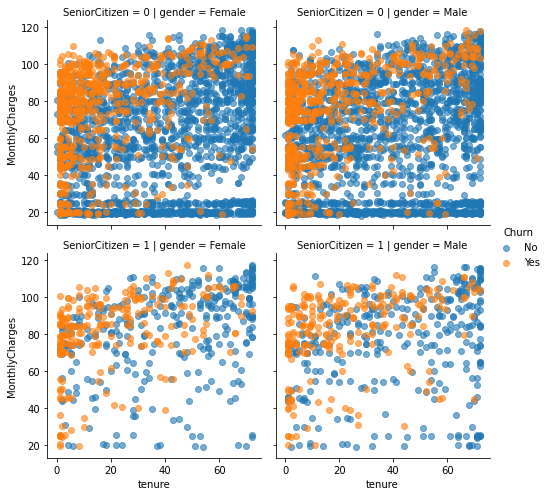

In [27]:
g = sns.FacetGrid(df, row='SeniorCitizen', col="gender", hue="Churn", height=3.5)
g.map(plt.scatter, "tenure", "MonthlyCharges", alpha=0.6)
g.add_legend();

Observation:
- One thing common among all age groups is , when the monthly charges are higher they are likely to churn.
- For younger males and females lower tenure corresponds to churning, compared to senior citizens who usually churn at higher monthly charges.

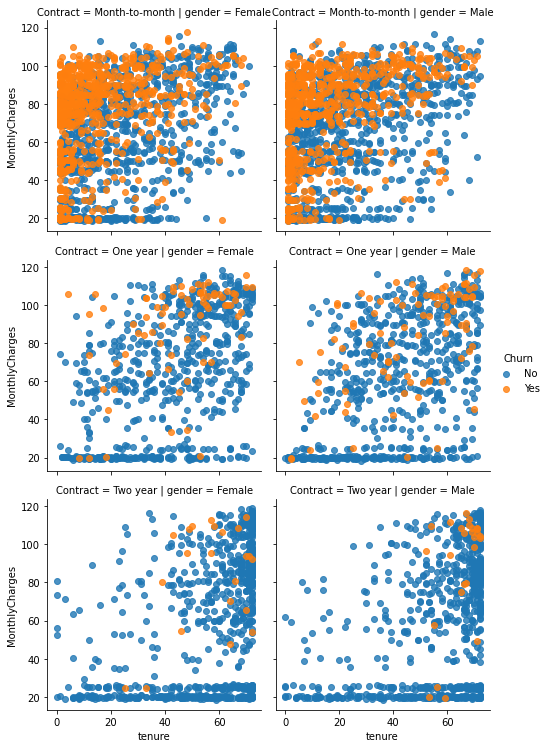

In [28]:
g = sns.FacetGrid(df, row='Contract', col="gender", hue="Churn", height=3.5)
g.map(plt.scatter, "tenure","MonthlyCharges", alpha=0.8)
g.add_legend();

Observation:
 - Month to month contract holders churn more at lower tenures.
 - 1&2 year contract holders churn at higher tenures irrespective of their genders.

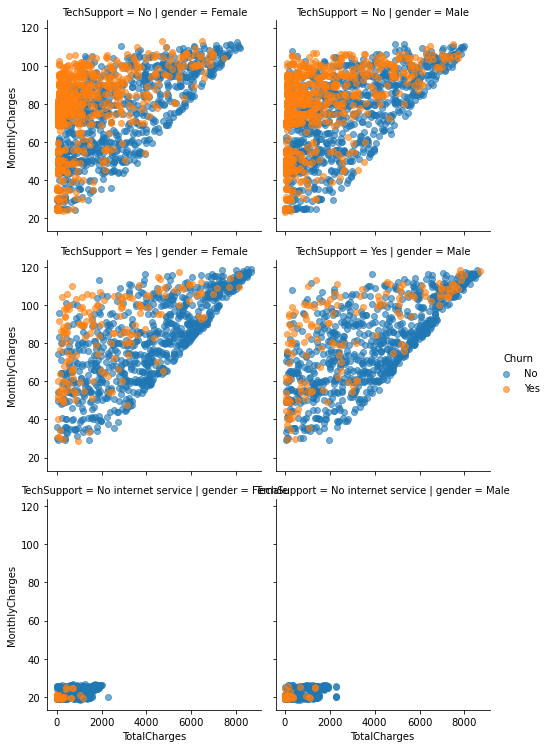

In [29]:
g = sns.FacetGrid(df, row='TechSupport', col="gender", hue="Churn", height=3.5)
g.map(plt.scatter, "TotalCharges","MonthlyCharges", alpha=0.6)
g.add_legend();

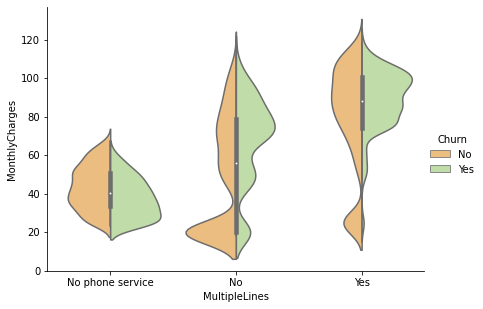

In [30]:
ax = sns.catplot(x="MultipleLines", y="MonthlyCharges", hue="Churn", kind="violin",
                 split=True, palette="Spectral", data=df, height=4.2, aspect=1.4)

Observation:
- Users with no phone service tend to churn at a lower monthly charge.
- Users who have multiple lines only churn at higher monthly charge whereas users with a single line churn almost evenly across Monthly charge.

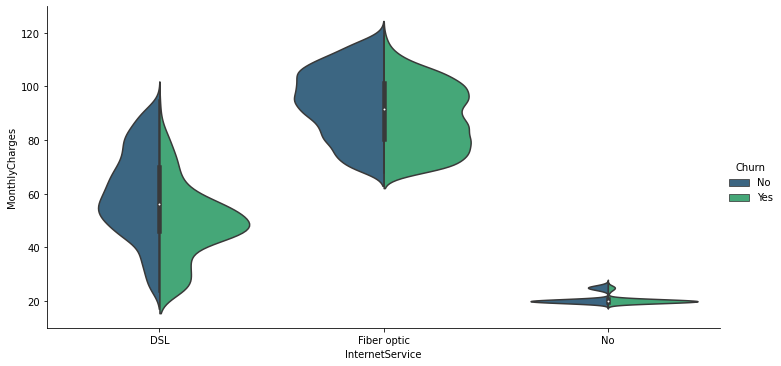

In [31]:
sns.catplot(x="InternetService", y="MonthlyCharges", hue="Churn", kind="violin",
                 split=True, palette="viridis", data=df, height=5, aspect=2)

Observations:
- Fibre optic users usually churn at a higher monthly charge
- DSL(slower service) have a lower churning rate at a higher prices than at 50.

In [32]:
num_df=df[["tenure","MonthlyCharges","TotalCharges"]].copy()

In [33]:
num_df.shape

(7043, 3)

array([[<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>],
       [<AxesSubplot:title={'center':'TotalCharges'}>, <AxesSubplot:>]],
      dtype=object)

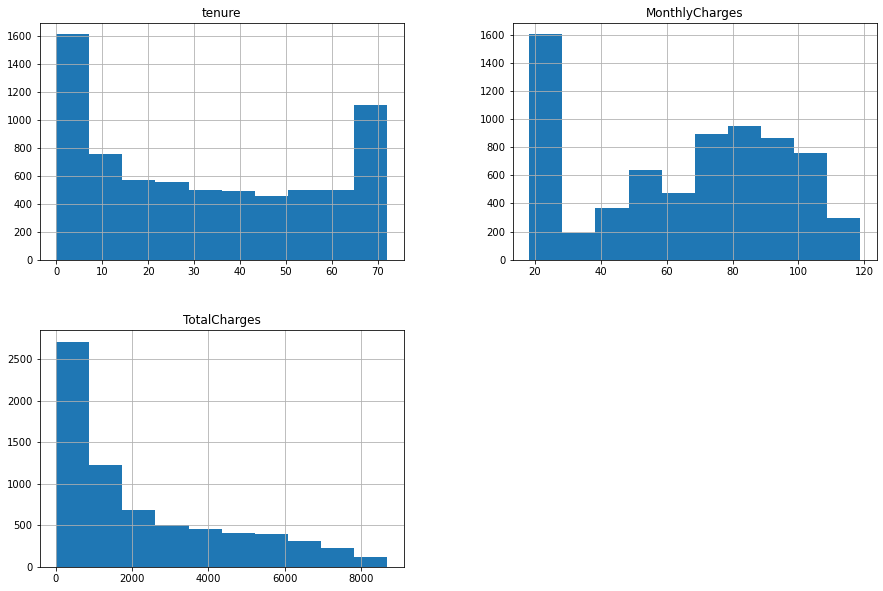

In [34]:
num_df.hist(figsize=(15,10))

# Data Transformation:

<AxesSubplot:>

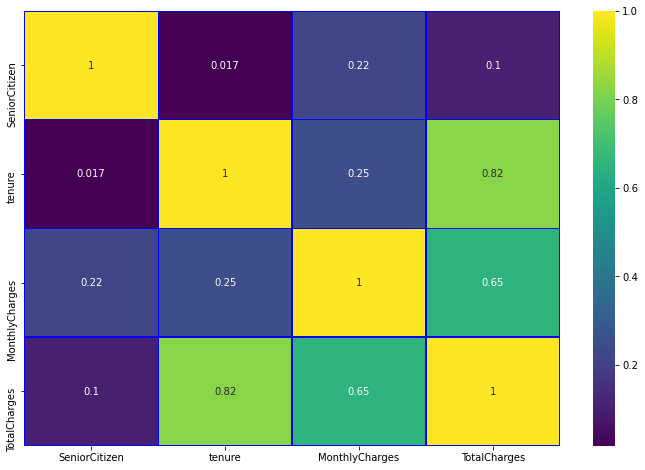

In [35]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,linewidths=0.2,linecolor="blue",cmap="viridis")

### Checking Outliers:

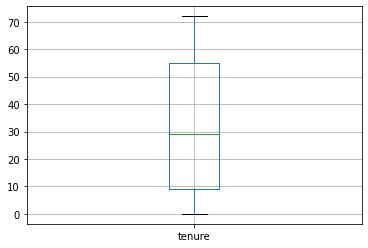

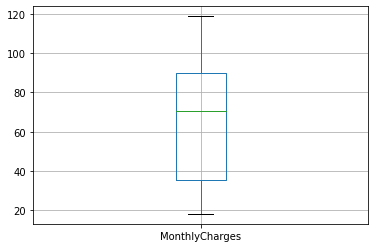

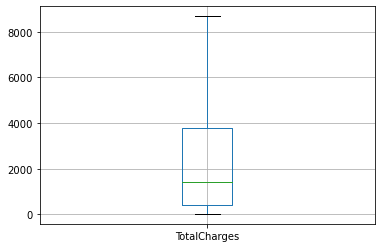

In [36]:
for col in num_df.columns:
    df.boxplot(column=col)
    plt.show()

**There are no outliers present!**

### Checking Skewness:

In [37]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

"SeniorCitizen" is categorical column which was already encoded in the data, so we need not perform transformation on this feature. We can perform log1p transformation on TotalCharges as its a numnerical column. 

In [38]:
df["TotalCharges"]=np.log1p(df["TotalCharges"])

In [39]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges     -0.745402
dtype: float64

We've reduced skewness but not significantly.

### Encoding :

In [40]:
le = LabelEncoder()

In [41]:
for col in cat_df.columns:
    if df[col].dtypes=="object":
        df[col]=le.fit_transform(df[col])

In [42]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,3.429137,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,7.544597,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,4.692723,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,7.518471,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,5.028148,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,7.596643,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,8.904345,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,5.850621,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,5.728800,1


In [43]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,6.944622,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,1.545545,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,2.985682,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,5.999494,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,7.245334,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,8.239488,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,9.069445,1.000000


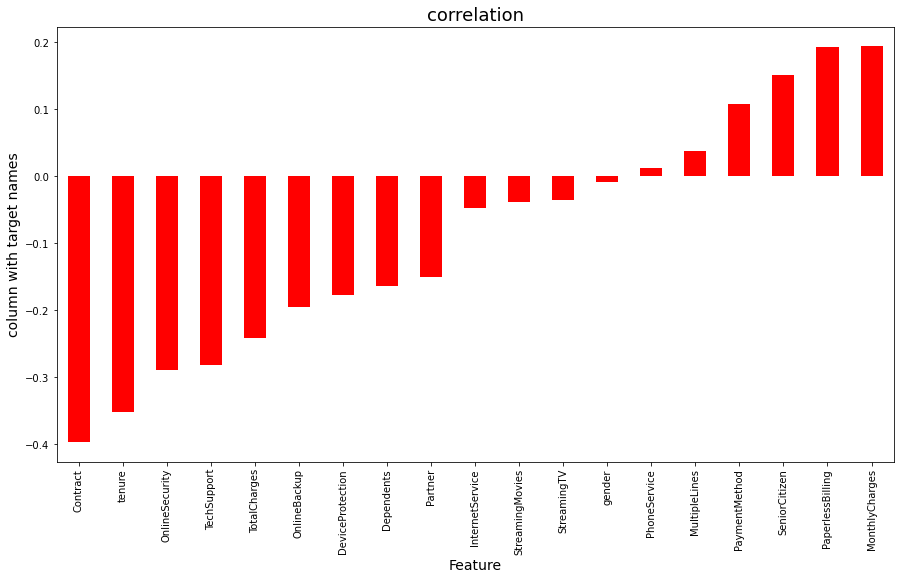

In [44]:
plt.figure(figsize=(15,8))
df.corr()['Churn'].sort_values(ascending=True).drop(['Churn']).plot(kind='bar',color='red')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

We can drop "gender" feature as evident from heatmap and corelation plot as its relation with target column is close to 0

<AxesSubplot:>

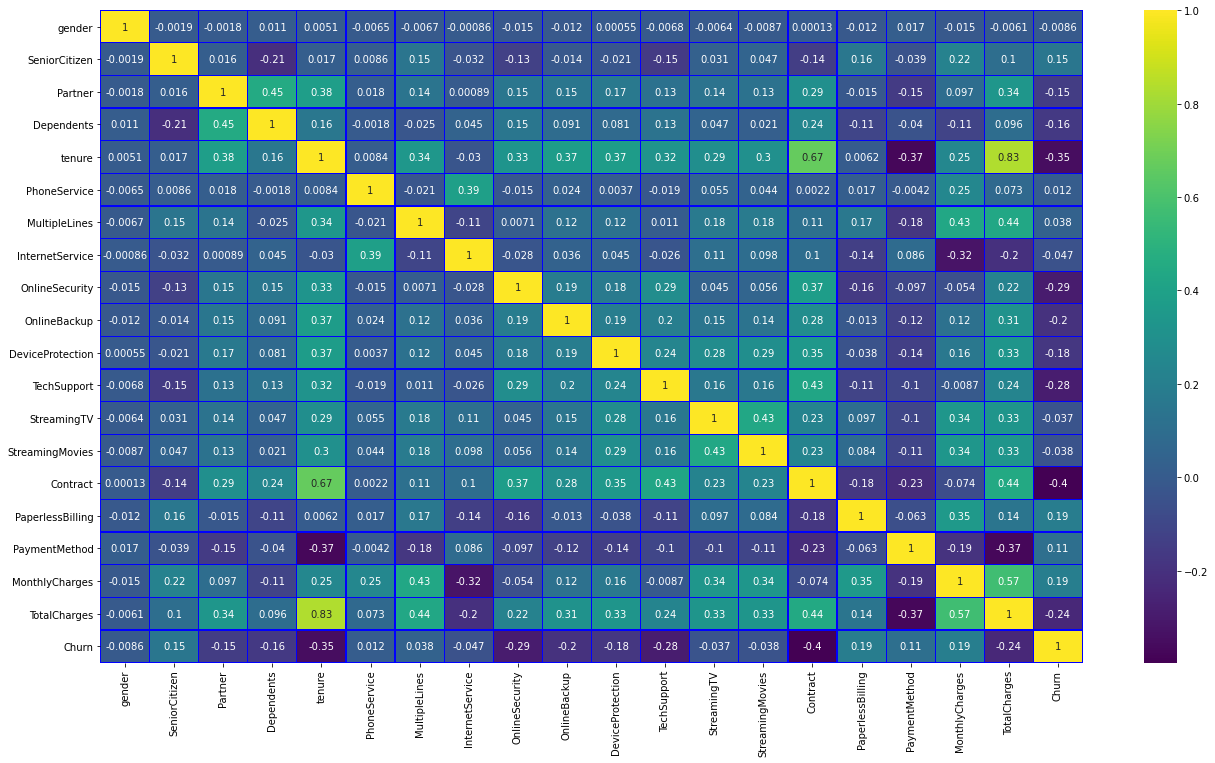

In [45]:
plt.figure(figsize=(22,12))
sns.heatmap(df.corr(),annot=True,linewidths=0.2,linecolor="blue",cmap="viridis")

Multicollinearity is not seen but we can affirm that suing vif.

In [46]:
df.shape

(7043, 20)

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [48]:
X=df #we have to check multicollinearity between input features which have been scaled and are stored in x
calc_vif(X)

,variables,VIF
0,gender,1.989893
1,SeniorCitizen,1.375297
2,Partner,2.829853
3,Dependents,1.976933
4,tenure,11.542109
5,PhoneService,16.006654
6,MultipleLines,2.768280
7,InternetService,4.365019
8,OnlineSecurity,2.301824
9,OnlineBackup,2.447220


In [49]:
df.drop(["TotalCharges","PhoneService"],axis=1,inplace=True) #Information is well captured by "monthlycharges", and hence dropping total charges will reduce multicollinearity.

In [50]:
df.drop("gender",axis=1,inplace=True)

In [51]:
X=df #we have to check multicollinearity between input features which have been scaled and are stored in x
calc_vif(X)

,variables,VIF
0,SeniorCitizen,1.368738
1,Partner,2.819612
2,Dependents,1.941097
3,tenure,7.661251
4,MultipleLines,2.677701
5,InternetService,2.402056
6,OnlineSecurity,2.237130
7,OnlineBackup,2.441182
8,DeviceProtection,2.619745
9,TechSupport,2.377747


We've highly reduced the multicollinearity by dropping highly collinear columns.

<AxesSubplot:>

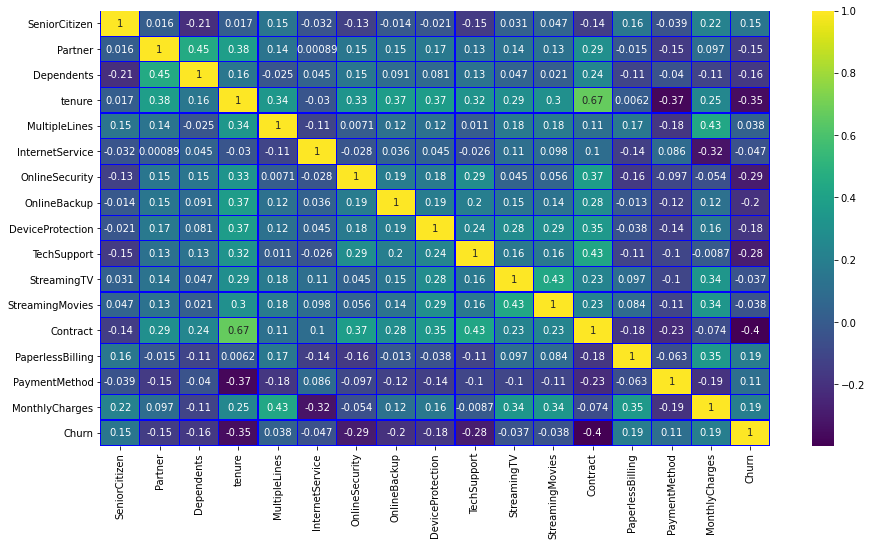

In [52]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,linewidths=0.2,linecolor="blue",cmap="viridis")

# Data Preprocessing:

### Splitting the dataset:

In [53]:
x=df.drop("Churn",axis=1)
y=df["Churn"]

### Scaling:

In [54]:
sc=StandardScaler()
xs=sc.fit_transform(x)
xs=pd.DataFrame(xs,columns=x.columns)

In [55]:
xs

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,-0.439916,1.034530,-0.654012,-1.277445,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323
1,-0.439916,-0.966622,-0.654012,0.066327,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629
2,-0.439916,-0.966622,-0.654012,-1.236724,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660
3,-0.439916,-0.966622,-0.654012,0.514251,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535
4,-0.439916,-0.966622,-0.654012,-1.236724,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.439916,1.034530,1.529024,-0.340876,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992
7039,-0.439916,1.034530,1.529024,1.613701,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533
7040,-0.439916,1.034530,1.529024,-0.870241,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632
7041,2.273159,1.034530,-0.654012,-1.155283,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338


<AxesSubplot:>

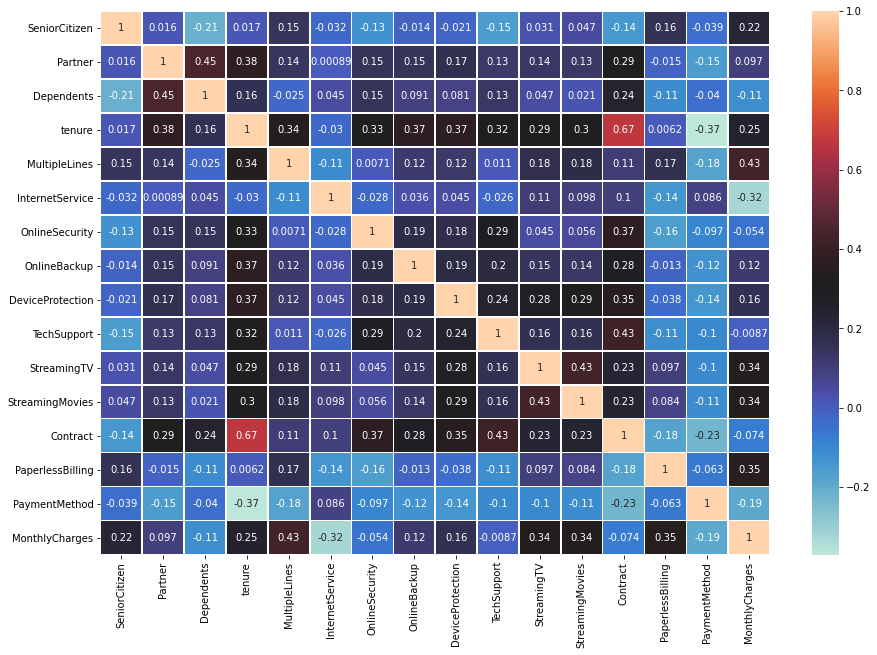

In [56]:
plt.figure(figsize=(15,10))
sns.heatmap(xs.corr(),annot=True,cmap="icefire",linewidth=0.7)

In [57]:
calc_vif(xs)

,variables,VIF
0,SeniorCitizen,1.145058
1,Partner,1.460758
2,Dependents,1.381199
3,tenure,2.748427
4,MultipleLines,1.348794
5,InternetService,1.248701
6,OnlineSecurity,1.246175
7,OnlineBackup,1.184425
8,DeviceProtection,1.274337
9,TechSupport,1.302940


Just to recheck if we have eliminated multicollinearity properly from the input features.

In [58]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

We can see that the target label is highly imbalanced. Thus, we will use SMOTE to balance the classes.

### Best Random State:

In [59]:
from imblearn.over_sampling import SMOTE

In [60]:
for i in range(0,500):
    # setting up testing and training sets
    X_train, X_test, y_train, y_test = train_test_split(xs, y, test_size=0.25, random_state=i)
    lr = LogisticRegression().fit(X_train, y_train)
    pred_train = lr.predict(X_train)
    pred_test = lr.predict(X_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At Random State = ",i)
        print("Training accuracy score: ",(accuracy_score(y_train,pred_train)*100))
        print("Testing accuracy score: ",(accuracy_score(y_test,pred_test)*100))

At Random State =  44
Training accuracy score:  80.32942067398713
Testing accuracy score:  80.29528676888131
At Random State =  51
Training accuracy score:  80.08330177962893
Testing accuracy score:  80.12492901760363
At Random State =  107
Training accuracy score:  80.14009844755773
Testing accuracy score:  80.06814310051107
At Random State =  115
Training accuracy score:  79.98864066641424
Testing accuracy score:  80.01135718341851
At Random State =  197
Training accuracy score:  80.17796289284362
Testing accuracy score:  80.23850085178876
At Random State =  212
Training accuracy score:  80.08330177962893
Testing accuracy score:  80.12492901760363
At Random State =  274
Training accuracy score:  80.08330177962893
Testing accuracy score:  80.12492901760363
At Random State =  294
Training accuracy score:  79.7235895494131
Testing accuracy score:  79.7274275979557
At Random State =  303
Training accuracy score:  79.98864066641424
Testing accuracy score:  80.01135718341851
At Random Stat

At Random State =  44
- Training accuracy score:  80.32942067398713
- Testing accuracy score:  80.29528676888131

In [61]:
X_train, X_test, y_train, y_test = train_test_split(xs, y, test_size=0.25, random_state=44)
sm = SMOTE(random_state=44)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [62]:
y_train.value_counts()

0    3876
1    3876
Name: Churn, dtype: int64

## Model 1: Decision Tree Classifier

In [63]:
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,30,3)), 
                  "min_samples_leaf":  list(range(5,20,3))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_
print("Best Parameters for Decision Tree: ", grid_tree.best_params_)
print("Best Score for Decision Tree: ", grid_tree.best_score_)

Best Parameters for Decision Tree:  {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 11}
Best Score for Decision Tree:  0.8047064744909631


In [64]:
dec_tree = DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=11).fit(X_train, y_train)
pred_train = dec_tree.predict(X_train)
pred_test = dec_tree.predict(X_test) 

In [65]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1298
           1       0.51      0.67      0.58       463

    accuracy                           0.74      1761
   macro avg       0.69      0.72      0.70      1761
weighted avg       0.77      0.74      0.75      1761



<AxesSubplot:title={'center':'Feature Importances of Decision Tree'}, xlabel='Importance'>

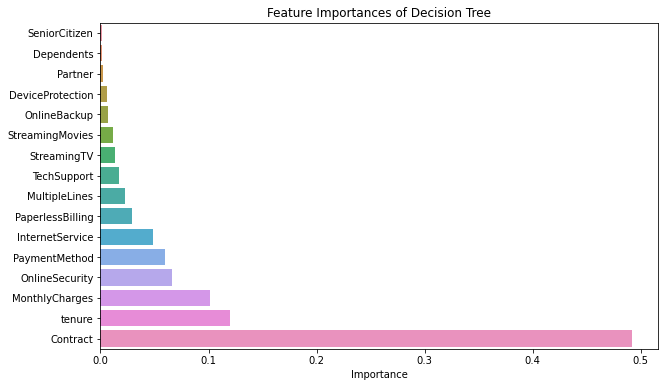

In [66]:
feat=pd.DataFrame({"Importance": tree_clf.feature_importances_}, 
                  index=xs.columns).sort_values(by="Importance")
plt.figure(figsize=(10,6))
plt.title("Feature Importances of Decision Tree")

sns.barplot(feat["Importance"],feat.index)

In [67]:
pred_dt = dec_tree.predict(X_test)
dts = accuracy_score(y_test,pred_dt)
for k in range(2,10):
    dtscore=cross_val_score(dec_tree,xs,y,cv=k)
    dtc=dtscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",dtc*100)
    print("accuracy score is : ",dts*100)
    print("\n")

At cv=  2
Cross Val score :  76.98411623227295
accuracy score is :  74.27597955706985


At cv=  3
Cross Val score :  77.89300899307948
accuracy score is :  74.27597955706985


At cv=  4
Cross Val score :  77.48147198131228
accuracy score is :  74.27597955706985


At cv=  5
Cross Val score :  77.59490531647202
accuracy score is :  74.27597955706985


At cv=  6
Cross Val score :  77.72287988350416
accuracy score is :  74.27597955706985


At cv=  7
Cross Val score :  78.04921076463617
accuracy score is :  74.27597955706985


At cv=  8
Cross Val score :  77.99258010009287
accuracy score is :  74.27597955706985


At cv=  9
Cross Val score :  77.70854950157457
accuracy score is :  74.27597955706985




At cv=  4
- Cross Val score :  77.49566846058542
- accuracy score is :  74.33276547416241

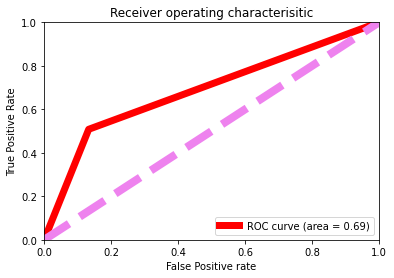

In [68]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds = roc_curve(pred_dt,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color="red",lw=7,label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color="violet",lw=8,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characterisitic")
plt.legend(loc="lower right")
plt.show()

## Model2: Random Forest Classifier

In [69]:
forest_params = {"max_depth": list(range(2,10,3)),"min_samples_leaf": list(range(5,20,3)),"n_estimators":[200,250,300,350]}
rand_forest = RandomizedSearchCV(RandomForestClassifier(), forest_params)
rand_forest.fit(X_train, y_train)
# forest best estimator
forest_clf = rand_forest.best_estimator_
print("Best Parameters for Random Forest: ", rand_forest.best_params_)
print("Best Score for Random Forest: ", rand_forest.best_score_)
print("\n")

Best Parameters for Random Forest:  {'n_estimators': 200, 'min_samples_leaf': 5, 'max_depth': 8}
Best Score for Random Forest:  0.8182486221168446




In [70]:
rfc = RandomForestClassifier(max_depth=8, min_samples_leaf=5,n_estimators=350).fit(X_train, y_train)
pred_train2 = rfc.predict(X_train)
pred_test2 = rfc.predict(X_test) 

<AxesSubplot:title={'center':'Feature Importances of Random Forest'}, xlabel='Importance'>

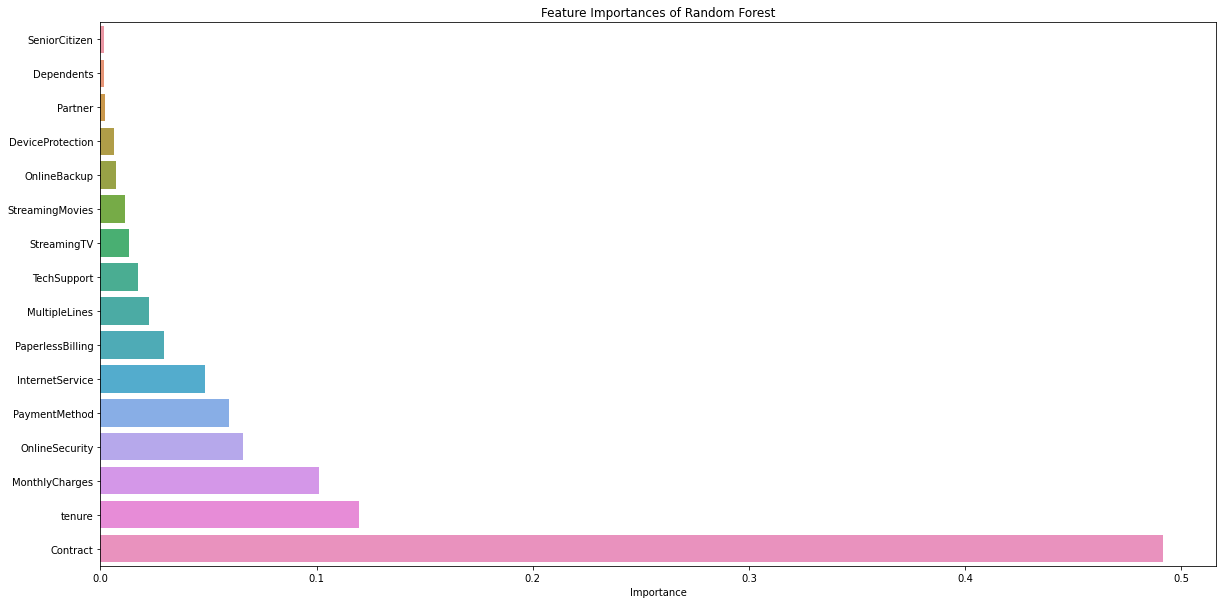

In [71]:
feat2=pd.DataFrame({"Importance": forest_clf.feature_importances_}, 
                  index=xs.columns).sort_values(by="Importance")
plt.figure(figsize=(20,10))
plt.title("Feature Importances of Random Forest")

sns.barplot(feat["Importance"],feat.index)

In [72]:
print(classification_report(y_test,pred_test2))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1298
           1       0.56      0.73      0.64       463

    accuracy                           0.78      1761
   macro avg       0.73      0.76      0.74      1761
weighted avg       0.81      0.78      0.79      1761



In [73]:
pred_rfc = rfc.predict(X_test)
rss = accuracy_score(y_test,pred_rfc)
for k in range(2,6):
    rsscore=cross_val_score(rfc,xs,y,cv=k)
    rsc=rsscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",rsc*100)
    print("accuracy score is : ",rss*100)
    print("\n")

At cv=  2
Cross Val score :  80.2498830332679
accuracy score is :  77.96706416808632


At cv=  3
Cross Val score :  80.24990884493283
accuracy score is :  77.96706416808632


At cv=  4
Cross Val score :  80.23574221774817
accuracy score is :  77.96706416808632


At cv=  5
Cross Val score :  80.19318786695916
accuracy score is :  77.96706416808632


At cv=  6
Cross Val score :  80.16473483203617
accuracy score is :  77.96706416808632


At cv=  7
Cross Val score :  80.05098928347914
accuracy score is :  77.96706416808632


At cv=  8
Cross Val score :  80.30653441337323
accuracy score is :  77.96706416808632




At cv=  7
- Cross Val score :  80.05098928347914
- accuracy score is :  77.96706416808632

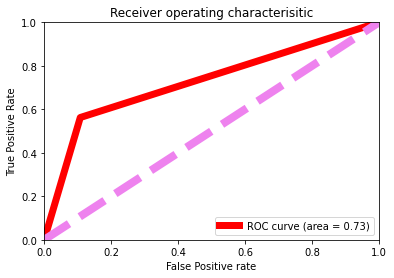

In [74]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds = roc_curve(pred_rfc,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color="red",lw=7,label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color="violet",lw=8,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characterisitic")
plt.legend(loc="lower right")
plt.show()

## Model 3: Support Vector Classifier

In [75]:
log_reg_params = {"penalty": ['l1', 'l2','elasticnet','none'], 'C': [0.01, 0.1, 1, 10],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params)
rand_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = rand_log_reg.best_estimator_
print("Best Parameters for Logistic Regression: ", rand_log_reg.best_params_)
print("Best Score for Logistic Regression: ", rand_log_reg.best_score_)
print("------------------------------------------")

Best Parameters for Logistic Regression:  {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.01}
Best Score for Logistic Regression:  0.7718029991056758
------------------------------------------


In [76]:
lr = LogisticRegression(solver='newton-cg',C= 0.01, penalty= 'l2').fit(X_train, y_train)
pred_train3 = lr.predict(X_train)
pred_test3 = lr.predict(X_test)

In [77]:
print(classification_report(y_test,pred_test3))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1298
           1       0.52      0.79      0.63       463

    accuracy                           0.75      1761
   macro avg       0.71      0.77      0.72      1761
weighted avg       0.81      0.75      0.77      1761



In [78]:
pred_lr = lr.predict(X_test)
lss = accuracy_score(y_test,pred_lr)
for k in range(2,10):
    lsscore=cross_val_score(lr,xs,y,cv=k)
    lsc=lsscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",lsc*100)
    print("accuracy score is : ",lss*100)
    print("\n")

At cv=  2
Cross Val score :  79.71037246949066
accuracy score is :  75.35491198182851


At cv=  3
Cross Val score :  79.78140688258864
accuracy score is :  75.35491198182851


At cv=  4
Cross Val score :  80.02275469774405
accuracy score is :  75.35491198182851


At cv=  5
Cross Val score :  79.92346280405187
accuracy score is :  75.35491198182851


At cv=  6
Cross Val score :  79.93762747179706
accuracy score is :  75.35491198182851


At cv=  7
Cross Val score :  80.06533081268384
accuracy score is :  75.35491198182851


At cv=  8
Cross Val score :  80.0229110772882
accuracy score is :  75.35491198182851


At cv=  9
Cross Val score :  79.96609901294813
accuracy score is :  75.35491198182851




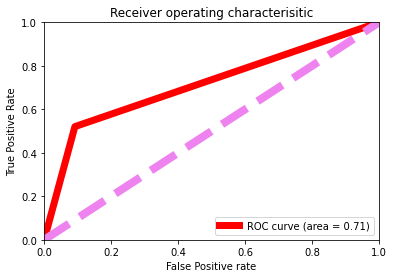

In [79]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds = roc_curve(pred_test3,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color="red",lw=7,label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color="violet",lw=8,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characterisitic")
plt.legend(loc="lower right")
plt.show()

## Model 4: Gradient Boosting Classifier

In [81]:
params={'n_estimators':[15, 20,25,30],
           'learning_rate':[0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1],
           'max_features':[1,2,3],
           'max_depth':[1,2,3],
           'random_state':[0,1,2]
           }

In [82]:
rand_gbc = RandomizedSearchCV(GradientBoostingClassifier(), params)
rand_gbc.fit(X_train, y_train)
# SVC best estimator
gbc= rand_gbc.best_estimator_
print("Best Parameters for SVM: ", rand_gbc.best_estimator_)
print("Best Score for SVM: ", rand_gbc.best_score_)
print("------------------------------------------")

Best Parameters for SVM:  GradientBoostingClassifier(learning_rate=1, max_features=2, n_estimators=25,
                           random_state=2)
Best Score for SVM:  0.8235466816413968
------------------------------------------


In [83]:
gbc = GradientBoostingClassifier(learning_rate=0.5, max_depth=2, max_features=3,n_estimators=30, random_state=0).fit(X_train, y_train)
pred_train4 = lr.predict(X_train)
pred_test4 = lr.predict(X_test)

In [84]:
print(classification_report(y_test,pred_test4))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1298
           1       0.52      0.79      0.63       463

    accuracy                           0.75      1761
   macro avg       0.71      0.77      0.72      1761
weighted avg       0.81      0.75      0.77      1761



In [85]:
lss = accuracy_score(y_test,pred_test4)
for k in range(2,10):
    lsscore=cross_val_score(lr,xs,y,cv=k)
    lsc=lsscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",lsc*100)
    print("accuracy score is : ",lss*100)
    print("\n")

At cv=  2
Cross Val score :  79.71037246949066
accuracy score is :  75.35491198182851


At cv=  3
Cross Val score :  79.78140688258864
accuracy score is :  75.35491198182851


At cv=  4
Cross Val score :  80.02275469774405
accuracy score is :  75.35491198182851


At cv=  5
Cross Val score :  79.92346280405187
accuracy score is :  75.35491198182851


At cv=  6
Cross Val score :  79.93762747179706
accuracy score is :  75.35491198182851


At cv=  7
Cross Val score :  80.06533081268384
accuracy score is :  75.35491198182851


At cv=  8
Cross Val score :  80.0229110772882
accuracy score is :  75.35491198182851


At cv=  9
Cross Val score :  79.96609901294813
accuracy score is :  75.35491198182851




At cv=  3
- Cross Val score :  79.78140688258864
- accuracy score is :  75.35491198182851

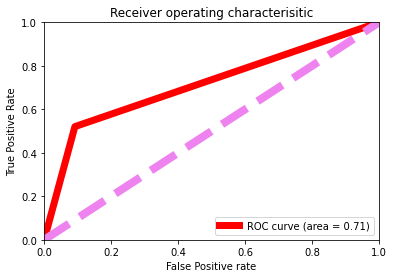

In [86]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds = roc_curve(pred_test4,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color="red",lw=7,label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color="violet",lw=8,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characterisitic")
plt.legend(loc="lower right")
plt.show()

**Conclusion: We can see that random forest classifier performs the best among all with cv score: 80% and accuracy score:78% and ROC curve area = 0.73**

# Saving the model:

In [88]:
filename = "telco_Churn.pkl"
pickle.dump(rfc,open(filename,'wb'))
#saving the file